In [10]:
# those modules are almost always imported when working with model data
%matplotlib inline
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr # the major tool to work with NetCDF data!

import os
from glob import glob
import matplotlib.pyplot as plt
import cfgrib

## First load Gravity CSV for sampling

In [11]:
import pandas as pd
from glob import glob
def importOIBgrav(basedir, timedir):
    # datadir = 'IGGRV1B/temp'
    # infile = 'IGGRV1B_20091104_13100500_V016'
    # infile = 'IGGRV1B_20091031_11020500_V016'
    # infile = 'IGGRV1B_20091116_15124500_V016'
    suffix = '.txt'
    pattern = os.path.join(basedir, timedir, 'IGGRV1B_20161114_11243000_V017*' + suffix)
    infile = sorted(glob(pattern))  # , key=alphanum_key)

    ### Read ascii file as csv
    # metadata ends on line 69, column names on line 70
    headers = (
        'LAT', 'LONG', 'DATE', 'DOY', 'TIME', 'FLT', 'PSX', 'PSY', 'WGSHGT', 'FX', 'FY', 'FZ', 'EOTGRAV', 'FACOR',
        'INTCOR',
        'FAG070', 'FAG100', 'FAG140', 'FLTENVIRO')
    # print "Reading gravity file: %s" % infile[0] + suffix %TODO why did I think this would be a list?
    print("Reading gravity file: %s" % infile[0] + suffix)
    df = pd.read_csv(infile[0], delimiter=r"\s+", header=None, names=headers, skiprows=70)
    # headers = df.columns[1:df.shape[1]]
    # df.rename(columns=dict(zip(df.columns,headers)), inplace=True)
    # df.rename(columns={'LONG': 'LON'}, inplace=True)
    # df['ENVIRO'] = df.columns[[19]]
    # df.drop(df.columns['FLTENVIRO'],axis=1,inplace=True)

    ### do some DATETIME operations
    df['DATETIME'] = (df.DATE * 1e5) + df.TIME
    df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
    df['UNIX'] = df['DATE'].astype(np.int64) // 10 ** 9
    df['UNIX'] = df['UNIX'] + df['TIME']
    df['iunix'] = pd.to_datetime(df['UNIX'] * 10 ** 3, unit='ms')
    df.drop(['DATETIME'], axis=1, inplace=True)
    df = df.set_index('iunix')
    return df

basedir = '/Users/dporter/Documents/data_local/Antarctica/OIB/'
datadir = 'IGGRV1B'
timedir = 2016
grav = importOIBgrav(os.path.join(basedir, datadir), str(timedir))


Reading gravity file: /Users/dporter/Documents/data_local/Antarctica/OIB/IGGRV1B/2016/IGGRV1B_20161114_11243000_V017.txt.txt


In [12]:
grav.head()

,LAT,LONG,DATE,DOY,TIME,FLT,PSX,PSY,WGSHGT,FX,FY,FZ,EOTGRAV,FACOR,INTCOR,FAG070,FAG100,FAG140,FLTENVIRO,UNIX
iunix,,,,,,,,,,,,,,,,,,,,
2016-11-14 11:24:30.000,-53.004590,-70.845986,2016-11-14,319,41070.0,621,-3929452.26,1364844.81,50.57,5.01,-15.79,981296.93,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.479123e+09
2016-11-14 11:24:30.500,-53.004590,-70.845986,2016-11-14,319,41070.5,621,-3929452.26,1364844.81,50.57,4.52,-15.33,981297.13,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.479123e+09
2016-11-14 11:24:31.000,-53.004590,-70.845985,2016-11-14,319,41071.0,621,-3929452.27,1364844.82,50.56,3.46,-14.49,981297.14,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.479123e+09
2016-11-14 11:24:31.500,-53.004590,-70.845985,2016-11-14,319,41071.5,621,-3929452.27,1364844.83,50.55,2.05,-13.60,981296.95,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.479123e+09
2016-11-14 11:24:32.000,-53.004589,-70.845985,2016-11-14,319,41072.0,621,-3929452.28,1364844.85,50.54,0.73,-13.01,981296.61,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.479123e+09


# AMPS

## NETCDF

In [146]:
# /Volumes/SeagateBLUE/data_SeagateBlue/Antarctic/AMPS/wrfout-raw

basedir = '/Users/dporter/Documents/data_local'
datadir = 'Antarctica/AMPS'
infile = 'wrfout_d02_2017101900_f003'
suffix = '.nc'
nc_file = os.path.join(basedir,datadir,infile+suffix)
print("Data file is %s" % (nc_file))

Data file is /Users/dporter/Documents/data_local/Antarctica/AMPS/wrfout_d02_2017101900_f003.nc


In [216]:
# ds = xarray.open_mfdataset(nc_file)
ds_nc = xr.open_dataset(nc_file)

In [217]:
ds_nc.coords

Coordinates:
    XLAT     (Time, south_north, west_east) float32 ...
    XLONG    (Time, south_north, west_east) float32 ...
    XTIME    (Time) datetime64[ns] ...
    XLAT_U   (Time, south_north, west_east_stag) float32 ...
    XLONG_U  (Time, south_north, west_east_stag) float32 ...
    XLAT_V   (Time, south_north_stag, west_east) float32 ...
    XLONG_V  (Time, south_north_stag, west_east) float32 ...

In [218]:
# time_selector = ds_nc.Time.values.tolist()
time_selector = ds_nc.Time.values
print(time_selector[0])

0


In [219]:
# ds_nc = ds_nc.set_index(Time='XTIME')

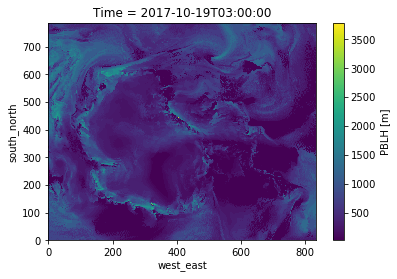

In [213]:
# ds_NC.PBLH.sel(XTIME="03:00:00", g0_lat_2=lat, g0_lon_3=lon,
#                           method='nearest')

# ds_nc
ds_nc.PBLH.sel(Time=time_selector, method='nearest').plot()

In [215]:
ds_nc.set_index(south_north='XLAT', inplace=True)

/Users/dporter/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  """Entry point for launching an IPython kernel.


ValueError: conflicting sizes for dimension 'south_north': length 1 on 'south_north' and length 786 on 'XLONG'

In [220]:
import salem

ImportError: cannot import name 'basestring'

# GRIB

In [17]:
# /Volumes/SeagateBLUE/data_SeagateBlue/Antarctic/AMPS/wrfout-raw

basedir = '/Users/dporter/Documents/data_local'
datadir = 'Antarctica/AMPS'
infile = '2019062512_WRF_d2_f003'
suffix = '.grb'
grib_file = os.path.join(basedir,datadir,infile+suffix)
print("Data file is %s" % (grib_file))

Data file is /Users/dporter/Documents/data_local/Antarctica/AMPS/2019062512_WRF_d2_f003.grb


### pynio

In [84]:
ds = xr.open_dataset(grib_file, engine='pynio') # , engine="cfgrib", , engine="pynio"


In [85]:
ds

<xarray.Dataset>
Dimensions:               (g5_x_0: 786, g5_y_1: 834, lv_DBLY3: 4, lv_GPML4: 2, lv_ISBL2: 21, lv_ISBL5: 17)
Coordinates:
  * lv_ISBL5              (lv_ISBL5) int32 100 150 200 250 ... 925 950 975 1000
  * lv_GPML4              (lv_GPML4) int32 150 300
  * lv_ISBL2              (lv_ISBL2) int32 20 30 50 70 100 ... 925 950 975 1000
    g5_lat_0              (g5_x_0, g5_y_1) float32 ...
    g5_lon_1              (g5_x_0, g5_y_1) float32 ...
Dimensions without coordinates: g5_x_0, g5_y_1, lv_DBLY3
Data variables:
    PRES_GDS5_SFC         (g5_x_0, g5_y_1) float32 ...
    PRMSL_GDS5_MSL        (g5_x_0, g5_y_1) float32 ...
    HGT_GDS5_SFC          (g5_x_0, g5_y_1) float32 ...
    HGT_GDS5_CBL          (g5_x_0, g5_y_1) float32 ...
    HGT_GDS5_ISBL         (lv_ISBL2, g5_x_0, g5_y_1) float32 ...
    TMP_GDS5_SFC          (g5_x_0, g5_y_1) float32 ...
    TMP_GDS5_ISBL         (lv_ISBL2, g5_x_0, g5_y_1) float32 ...
    TMP_GDS5_HTGL         (g5_x_0, g5_y_1) float32 ...
    TMP_G

In [130]:
print(sorted(ds_nc.variables))

['ACGRDFLX', 'ACHFX', 'ACLHF', 'ACLWDNB', 'ACLWDNBC', 'ACLWDNT', 'ACLWDNTC', 'ACLWUPB', 'ACLWUPBC', 'ACLWUPT', 'ACLWUPTC', 'ACSNOM', 'ALBBCK', 'ALBEDO', 'BF', 'BH', 'C1F', 'C1H', 'C2F', 'C2H', 'C3F', 'C3H', 'C4F', 'C4H', 'CANWAT', 'CF1', 'CF2', 'CF3', 'CFN', 'CFN1', 'CLAT', 'COSALPHA', 'COSZEN', 'DN', 'DNW', 'DZS', 'E', 'EMISS', 'F', 'FNM', 'FNP', 'GLW', 'GRAUPELNC', 'GRDFLX', 'HAILNC', 'HFX', 'HFX_FORCE', 'HFX_FORCE_TEND', 'HGT', 'ISEEDARRAY_SPP_CONV', 'ISEEDARRAY_SPP_LSM', 'ISEEDARRAY_SPP_PBL', 'ISEEDARR_RAND_PERTURB', 'ISEEDARR_SKEBS', 'ISEEDARR_SPPT', 'ISLTYP', 'ITIMESTEP', 'IVGTYP', 'LAI', 'LAKEMASK', 'LANDMASK', 'LH', 'LH_FORCE', 'LH_FORCE_TEND', 'LU_INDEX', 'LWDNB', 'LWDNBC', 'LWDNT', 'LWDNTC', 'LWUPB', 'LWUPBC', 'LWUPT', 'LWUPTC', 'MAPFAC_M', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_U', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_V', 'MAPFAC_VX', 'MAPFAC_VY', 'MAX_MSTFX', 'MAX_MSTFY', 'MF_VX_INV', 'MU', 'MUB', 'NOAHRES', 'OLR', 'P', 'P00', 'PB', 'PBLH', 'PC', 'PCB', 'PH', 'PHB', 'PSFC', 'P_HYD'

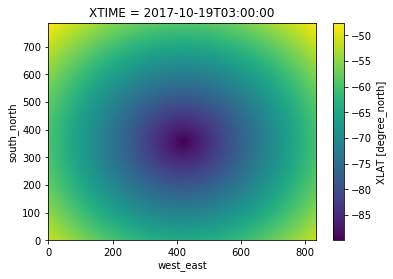

In [131]:
ds_nc.XLAT.plot()

### cfgrib

In [87]:
# cfgrib.open_datasets(grib_file)

In [88]:
# ds = xr.open_dataset(grib_file, engine='cfgrib',
#                      backend_kwargs={'filter_by_keys': {'typeOfLevel': 'surface',
#                                                        'typeOfLevel': 'isobaricInhPa',
#                                                        'typeOfLevel': 'heightAboveSea',
#                                                        'typeOfLevel': 'depthBelowLandLayer',
#                                                        'typeOfLevel': 'cloudBase'}})


In [94]:
# print(sorted(ds.dimensions.items()))
# print(sorted(ds.variables))

In [90]:
# ds

### Quick Plots

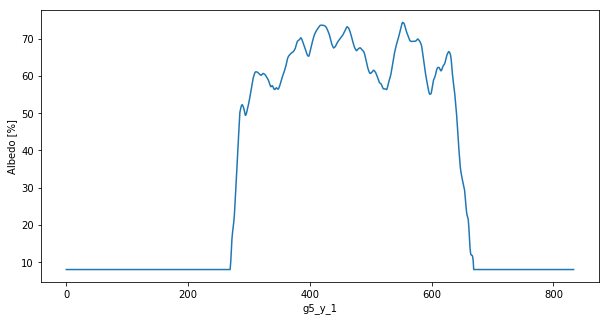

In [92]:
ds['ALBDO_GDS5_SFC'][0].plot(aspect=2,size=5);

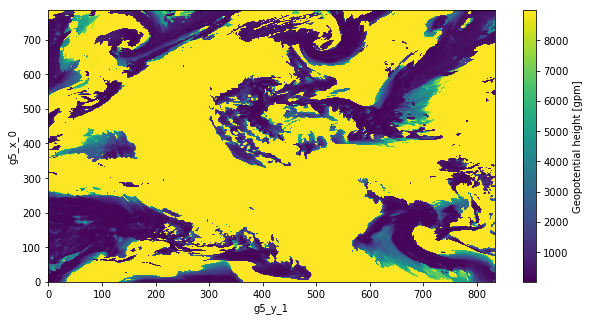

In [95]:
ds['HGT_GDS5_CBL'].plot(aspect=2,size=5);

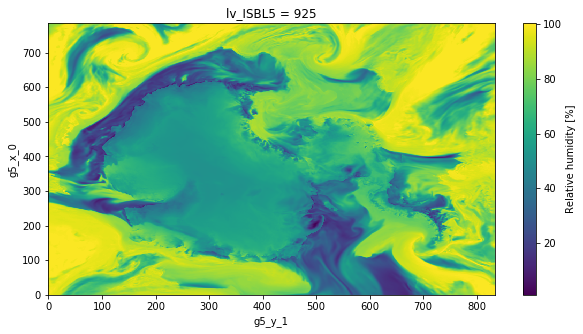

In [104]:
ds['R_H_GDS5_ISBL'][-4].plot(aspect=2,size=5);

In [118]:
print(ds.lv_ISBL5.values)
print(ds.lv_ISBL2.values)
print(ds.lv_GPML4.values)
print(ds.lv_DBLY3.values)
print(ds.lv_DBLY3_l0.values)
print(ds.lv_DBLY3_l1.values)
print(ds.var)

[ 100  150  200  250  300  400  500  600  700  800  850  875  900  925
  950  975 1000]
[  20   30   50   70  100  150  200  250  300  400  500  600  700  800
  850  875  900  925  950  975 1000]
[150 300]
[0 1 2 3]
[  0  10  40 100]
[ 10  40 100 200]
<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:               (g5_x_0: 786, g5_y_1: 834, lv_DBLY3: 4, lv_GPML4: 2, lv_ISBL2: 21, lv_ISBL5: 17)
Coordinates:
  * lv_ISBL5              (lv_ISBL5) int32 100 150 200 250 ... 925 950 975 1000
  * lv_GPML4              (lv_GPML4) int32 150 300
  * lv_ISBL2              (lv_ISBL2) int32 20 30 50 70 100 ... 925 950 975 1000
    g5_lat_0              (g5_x_0, g5_y_1) float32 ...
    g5_lon_1              (g5_x_0, g5_y_1) float32 ...
Dimensions without coordinates: g5_x_0, g5_y_1, lv_DBLY3
Data variables:
    PRES_GDS5_SFC         (g5_x_0, g5_y_1) float32 ...
    PRMSL_GDS5_MSL        (g5_x_0, g5_y_1) float32 ...
    HGT_GDS5_SFC          (g5

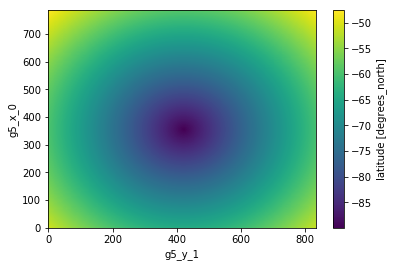

In [126]:
ds.g5_lat_0.plot()

In [ ]:
# ds.set_index(latdim='g5_lat_0', inplace=True)
# ds.set_index(londim='g5_lon_1', inplace=True)